In the reforms of the NHS in 2012/13, responsibility for Public Health trasferred from the NHS to public health departments in local goverment. Resposibility for funding medicines related to public health; substance dependence, some contraception and some vaccines transferred. This is because local authorities have responsibility for commissioning public health
services as part of their duty to take steps to improve the health of people in their area. Some of these services will involve the supply of medicines and appliances using NHS pharmacy services.
https://www.nhsbsa.nhs.uk/sites/default/files/2017-07/NHS_Reforms_factsheet_5_v2.0.pdf

This notebook sets out trends and variation for the POM medicines.

In [1]:
import pandas as pd
import numpy as np
from ebmdatalab import bq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
sql = '''SELECT
  extract(year from month) AS year,
  month,
  pct,
  bnf_code AS bnfcode,
  bnf_name AS bnfname,
  ccg.org_type AS org_type,
  SUM(items) AS total_items,
  SUM(quantity) AS total_qty,
  SUM(actual_cost) AS actual_cost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
JOIN
  hscic.ccgs AS ccg #this joins to our CCG organisational data
ON
  presc.pct = ccg.code
WHERE
(bnf_code LIKE "0410%"  ##drugs used in substance dependence
or bnf_code LIKE "0703023L0%" ## Levonorgestrel IUS/IUD
or bnf_code LIKE "0703022M0%" ### depo provera
or bnf_code LIKE "21040000210  "    ##Dt App_Iucd: Type 1 A/B/C/D (Lippes Loop)
or bnf_code LIKE "21040000230  "    ##Dt App_Iucd: Type 3 (Gravigard)
or bnf_code LIKE "21040000240  "    ##Dt App_Iucd:Type 4a (Ortho Gyne-T)
or bnf_code LIKE "21040000241  "    ##Gyne-T 380S Iucd
or bnf_code LIKE "21040000245  "    ##GyneFix Iucd
or bnf_code LIKE "21040000246  "    ##GyneFixPT Iucd
or bnf_code LIKE "21040000247  "    ##Flexi-T 300 Iucd
or bnf_code LIKE "21040000248  "    ##Flexi-T+380 Iucd
or bnf_code LIKE "21040000250  "    ##Multiload CU250 Iucd
or bnf_code LIKE "21040000255  "    ##Multiload CU250 Short Iucd
or bnf_code LIKE "21040000256  "    ##Multiload CU375 Iucd
or bnf_code LIKE "21040000257  "    ##Ancora 375 Ag Iucd
or bnf_code LIKE "21040000258  "    ##Ancora 375 Cu Iucd
or bnf_code LIKE "21040000260  "    ##Nova-T Iucd
or bnf_code LIKE "21040000261  "    ##Nova-T 380 Iucd
or bnf_code LIKE "21040000262  "    ##Novaplus T 380 Ag Iucd (Normal,Mini)
or bnf_code LIKE "21040000263  "    ##Novaplus T 380 Cu Iucd (Normal,Mini)
or bnf_code LIKE "21040000265  "    ##T-Safe 380A QL Iucd
or bnf_code LIKE "21040000266  "    ##Copper T380 A Iucd
or bnf_code LIKE "21040000270  "    ##Multi-Safe 375 Iucd
or bnf_code LIKE "21040000275  "    ##Neo-Safe T380 Iucd
or bnf_code LIKE "21040000278  "    ##Optima TCu380A Iucd
or bnf_code LIKE "21040000280  "    ##Load 375 Iucd
or bnf_code LIKE "21040000285  "    ##TT380 Slimline Iucd
or bnf_code LIKE "21040000286  "    ##Mini TT380 Slimline Iucd
or bnf_code LIKE "21040000290  "    ##UT380 Short Iucd
or bnf_code LIKE "21040000291  "    ##UT380 Stnd Iucd
or bnf_code LIKE "21040000295  ")    ##Steriload Iucd

##Dumas Type A No1 Vag Cap Contracep Dev	21040000311
##Dumas Type A No2 Vag Cap Contracep Dev	21040000312
##Dumas Type A No3 Vag Cap Contracep Dev	21040000313
##Dumas Type A No4 Vag Cap Contracep Dev	21040000314
##Dumas Type A No5 Vag Cap Contracep Dev	21040000315
##Prentif Type B 22mm Vag Cap Contracep Dev	21040000321
##Prentif Type B 25mm Vag Cap Contracep Dev	21040000322
##Prentif Type B 28mm Vag Cap Contracep Dev	21040000323
##Prentif Type B 31mm Vag Cap Contracep Dev	21040000324
##Vimule Type C No1 Vag Cap Contracep Dev	21040000331
##Vimule Type C No2 Vag Cap Contracep Dev	21040000332
##Vimule Type C No3 Vag Cap Contracep Dev	21040000333
##Dt App_Contracep Dev: Vag Diaph Type A	21040000410
##Dt App_Contracep Dev: Vag Diaph Type A (Durex/Ortho Type 2)	21040000419
##Vag Diaph Contracep Dev Type B (Type 1 BS 4028)	21040000420
##Vag Diaph Contracep Dev Type C (Type 3 BS 4028)	21040000421
##Reflexions Flat Spring Vag Diaph Contracep Dev	21040000425
##FemCap Soft Slc 22mm Vag Cap Contracep Dev	21040000430
##FemCap Soft Slc 26mm Vag Cap Contracep Dev	21040000431
##FemCap Soft Slc 30mm Vag Cap Contracep Dev	21040000432
##Milex Slc Omniflex-Coil Spring(TypeB)Vag Diaph Contracep Dev	21040000440
##Milex Slc Arcing-Arcing Spring(TypeC)Vag Diaph Contracep Dev	21040000441
##Ortho All-Flex Arcing-Arcing Spring (Type C) Vag Diaph C/Dev	21040000442
AND 
(bnf_code NOT LIKE "0410020B0%" ##nictotine
  AND bnf_code NOT LIKE "0410020D0%" ##nicotine bitartrate 
  AND bnf_code NOT LIKE "0410020A0%") ##bupropion, not used in UK routinely for smoking cessation.
GROUP BY
  year,
  month,
  pct,
  bnf_code,
  bnf_name,
  org_type'''
    
df_ph = bq.cached_read(sql, csv_path='df_publichealthmedicines.csv', use_cache=True)  # add `use_cache=False` to override
df_ph.head()

,year,month,pct,bnfcode,bnfname,org_type,total_items,total_qty,actual_cost
0,2015,2015-08-01,04K,0410030E0AAAAAA,Naltrexone HCl_Tab 50mg,CCG,16,386,285.38
1,2015,2015-08-01,02F,0703023L0AAAAAA,Levonorgest_Intra-Uterine Dev 20mcg/24hr,CCG,3,3,223.73
2,2015,2015-08-01,09H,0410030A0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,CCG,1,56,11.85
3,2015,2015-08-01,03M,0410030A0BBACAE,Subutex_Tab Subling 8mg,CCG,15,156,392.76
4,2015,2015-08-01,02W,0410030B0BBABAB,Suboxone_Tab Subling 2mg/0.5mg,CCG,1,21,18.29


In [3]:
## ensuring the format is consistent for pounds and pence
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
### grouping the total cost by year
phtotalcost = df_ph.groupby(['year'])['actual_cost'].sum()
phtotalcost

year
2010    47913673.69
2011   115664441.68
2012    84766309.06
2013    71710914.48
2014    62581481.93
2015    58937850.36
2016    53943426.54
2017    50563658.81
2018    55675446.28
2019    10686671.25
Name: actual_cost, dtype: float64

In [5]:
### grouping the total items by year
phtotalitems = df_ph.groupby(['year'])['total_items'].sum()
phtotalitems

year
2010    2688634
2011    6487246
2012    5072657
2013    4739529
2014    4467030
2015    4381296
2016    4283460
2017    4168855
2018    4133367
2019     685875
Name: total_items, dtype: int64

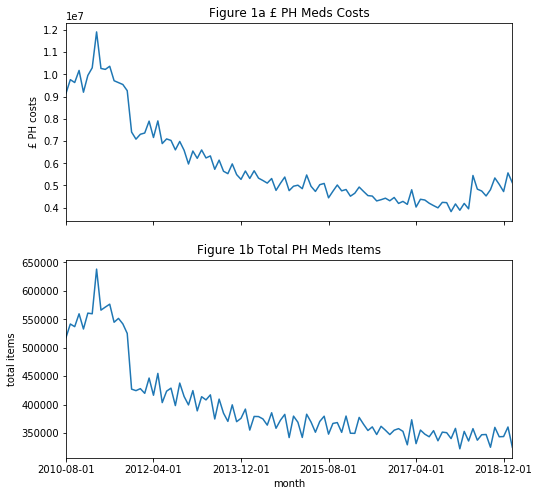

In [6]:
f = plt.figure(figsize=(8, 8))
layout = gridspec.GridSpec(2, 1, figure=f)
top_plot = plt.subplot(layout[0])
bottom_plot = plt.subplot(layout[1], sharex=top_plot)  # Share the Y axis 

ax = df_ph.groupby('month').sum()['actual_cost'].plot(ax=top_plot)
ax.set_ylabel('£ PH costs')
ax.set_title('Figure 1a £ PH Meds Costs')
ax = df_ph.groupby('month').sum()['total_items'].plot(ax=bottom_plot)
ax.set_ylabel('total items')
ax.set_title('Figure 1b Total PH Meds Items')
plt.show()

In [7]:
sql ='''WITH
  bnf_tab AS (
  SELECT
    DISTINCT chemical,
    chemical_code
  FROM
    ebmdatalab.hscic.bnf )  
SELECT
  extract(year from month) AS year,
  month,
  SUBSTR(presc.bnf_code,1,9) AS chemical_code,
  chemical,
  SUM(items) AS total_items,
  SUM(quantity) AS total_qty,
  SUM(actual_cost) AS actual_cost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
LEFT JOIN
  bnf_tab
ON
  chemical_code =SUBSTR(presc.bnf_code,1,9)
WHERE
(bnf_code LIKE "0410%"  ##drugs used in substance dependence
or bnf_code LIKE "0703023L0%" ## Levonorgestrel IUS/IUD
or bnf_code LIKE "0703022M0%" ### depo provera
or bnf_code LIKE "21040000210  "    ##Dt App_Iucd: Type 1 A/B/C/D (Lippes Loop)
or bnf_code LIKE "21040000230  "    ##Dt App_Iucd: Type 3 (Gravigard)
or bnf_code LIKE "21040000240  "    ##Dt App_Iucd:Type 4a (Ortho Gyne-T)
or bnf_code LIKE "21040000241  "    ##Gyne-T 380S Iucd
or bnf_code LIKE "21040000245  "    ##GyneFix Iucd
or bnf_code LIKE "21040000246  "    ##GyneFixPT Iucd
or bnf_code LIKE "21040000247  "    ##Flexi-T 300 Iucd
or bnf_code LIKE "21040000248  "    ##Flexi-T+380 Iucd
or bnf_code LIKE "21040000250  "    ##Multiload CU250 Iucd
or bnf_code LIKE "21040000255  "    ##Multiload CU250 Short Iucd
or bnf_code LIKE "21040000256  "    ##Multiload CU375 Iucd
or bnf_code LIKE "21040000257  "    ##Ancora 375 Ag Iucd
or bnf_code LIKE "21040000258  "    ##Ancora 375 Cu Iucd
or bnf_code LIKE "21040000260  "    ##Nova-T Iucd
or bnf_code LIKE "21040000261  "    ##Nova-T 380 Iucd
or bnf_code LIKE "21040000262  "    ##Novaplus T 380 Ag Iucd (Normal,Mini)
or bnf_code LIKE "21040000263  "    ##Novaplus T 380 Cu Iucd (Normal,Mini)
or bnf_code LIKE "21040000265  "    ##T-Safe 380A QL Iucd
or bnf_code LIKE "21040000266  "    ##Copper T380 A Iucd
or bnf_code LIKE "21040000270  "    ##Multi-Safe 375 Iucd
or bnf_code LIKE "21040000275  "    ##Neo-Safe T380 Iucd
or bnf_code LIKE "21040000278  "    ##Optima TCu380A Iucd
or bnf_code LIKE "21040000280  "    ##Load 375 Iucd
or bnf_code LIKE "21040000285  "    ##TT380 Slimline Iucd
or bnf_code LIKE "21040000286  "    ##Mini TT380 Slimline Iucd
or bnf_code LIKE "21040000290  "    ##UT380 Short Iucd
or bnf_code LIKE "21040000291  "    ##UT380 Stnd Iucd
or bnf_code LIKE "21040000295  ")    ##Steriload Iucd

##Dumas Type A No1 Vag Cap Contracep Dev	21040000311
##Dumas Type A No2 Vag Cap Contracep Dev	21040000312
##Dumas Type A No3 Vag Cap Contracep Dev	21040000313
##Dumas Type A No4 Vag Cap Contracep Dev	21040000314
##Dumas Type A No5 Vag Cap Contracep Dev	21040000315
##Prentif Type B 22mm Vag Cap Contracep Dev	21040000321
##Prentif Type B 25mm Vag Cap Contracep Dev	21040000322
##Prentif Type B 28mm Vag Cap Contracep Dev	21040000323
##Prentif Type B 31mm Vag Cap Contracep Dev	21040000324
##Vimule Type C No1 Vag Cap Contracep Dev	21040000331
##Vimule Type C No2 Vag Cap Contracep Dev	21040000332
##Vimule Type C No3 Vag Cap Contracep Dev	21040000333
##Dt App_Contracep Dev: Vag Diaph Type A	21040000410
##Dt App_Contracep Dev: Vag Diaph Type A (Durex/Ortho Type 2)	21040000419
##Vag Diaph Contracep Dev Type B (Type 1 BS 4028)	21040000420
##Vag Diaph Contracep Dev Type C (Type 3 BS 4028)	21040000421
##Reflexions Flat Spring Vag Diaph Contracep Dev	21040000425
##FemCap Soft Slc 22mm Vag Cap Contracep Dev	21040000430
##FemCap Soft Slc 26mm Vag Cap Contracep Dev	21040000431
##FemCap Soft Slc 30mm Vag Cap Contracep Dev	21040000432
##Milex Slc Omniflex-Coil Spring(TypeB)Vag Diaph Contracep Dev	21040000440
##Milex Slc Arcing-Arcing Spring(TypeC)Vag Diaph Contracep Dev	21040000441
##Ortho All-Flex Arcing-Arcing Spring (Type C) Vag Diaph C/Dev	21040000442
AND 
(bnf_code NOT LIKE "0410020B0%" ##nictotine
  AND bnf_code NOT LIKE "0410020D0%" ##nicotine bitartrate 
  AND bnf_code NOT LIKE "0410020A0%") ##bupropion, not used in UK routinely for smoking cessation.
GROUP BY
  year,
  month,
  chemical_code,
  chemical'''
    
df_phchemical = bq.cached_read(sql, csv_path='df_publichealthchemicals.csv', use_cache=True)  # add `use_cache=False` to override
df_phchemical.head()
    

,year,month,chemical_code,chemical,total_items,total_qty,actual_cost
0,2019,2019-02-01,0410010A0,Acamprosate Calcium,9645,951483,177526.67
1,2017,2017-04-01,0410010A0,Acamprosate Calcium,10071,1004106,186717.87
2,2012,2012-03-01,0410010B0,Disulfiram,4829,123897,56848.35
3,2016,2016-05-01,0410030A0,Buprenorphine Hydrochloride,59153,1323670,534616.94
4,2014,2014-05-01,0410030E0,Naltrexone Hydrochloride,1425,38186,57392.15


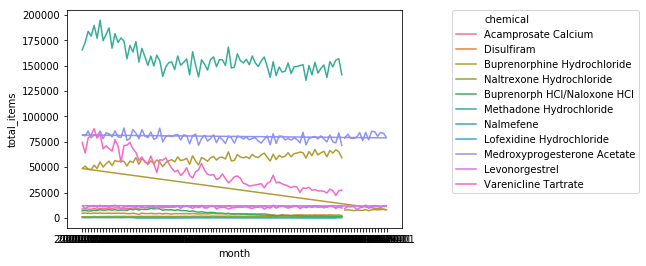

In [23]:
sns.lineplot(x="month", y="total_items", hue="chemical", legend="full",  data=df_phchemical)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

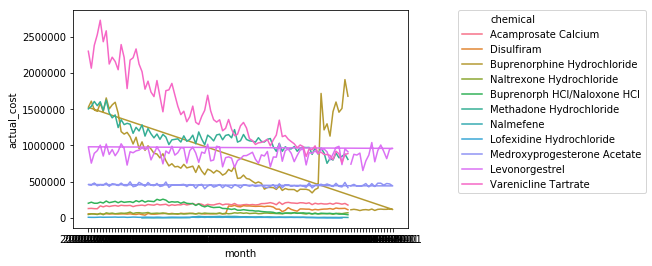

In [26]:
sns.lineplot(x="month", y="actual_cost", hue="chemical", legend="full",  data=df_phchemical)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)